In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
from datetime import datetime

df = pd.read_csv('data.csv')

c:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (29,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [37]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [38]:
df.nunique()

Station Name                           47
MAC Address                            83
Org Name                                2
Start Date                         244798
Start Time Zone                         3
End Date                           244159
End Time Zone                           3
Transaction Date (Pacific Time)    240905
Total Duration (hh:mm:ss)           31025
Charging Time (hh:mm:ss)            22473
Energy (kWh)                       118061
GHG Savings (kg)                    15535
Gasoline Savings (gallons)           6333
Port Type                               2
Port Number                             2
Plug Type                               2
EVSE ID                                51
Address 1                              20
City                                    1
State/Province                          1
Postal Code                             3
Country                                 1
Latitude                               62
Longitude                         

{1: 14888, 2: 23721, 3: 13898, 4: 14389, 5: 13436, 6: 7787, 7: 8996, 8: 1535, 9: 1044, 10: 7544, 11: 1420, 12: 5553, 13: 6212, 14: 6499, 15: 14432, 16: 10756, 17: 12669, 18: 9814, 19: 11163, 20: 4475, 21: 10484, 22: 9256, 23: 6930, 24: 8317, 25: 5857, 26: 3598, 27: 5332, 28: 2226, 29: 2455, 30: 4556, 31: 2217, 32: 4476, 33: 3428, 34: 13, 35: 3, 36: 4, 37: 1, 38: 2, 39: 4, 40: 7, 41: 8, 42: 2, 43: 4, 44: 1, 45: 1, 46: 1, 47: 1}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47] [14888, 23721, 13898, 14389, 13436, 7787, 8996, 1535, 1044, 7544, 1420, 5553, 6212, 6499, 14432, 10756, 12669, 9814, 11163, 4475, 10484, 9256, 6930, 8317, 5857, 3598, 5332, 2226, 2455, 4556, 2217, 4476, 3428, 13, 3, 4, 1, 2, 4, 7, 8, 2, 4, 1, 1, 1, 1]


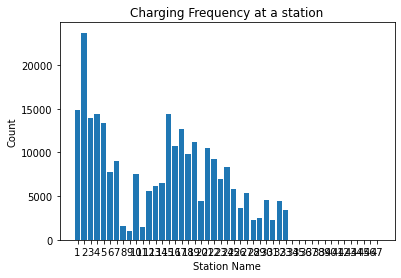

In [44]:
#This plot represents how many times a particular charging station has been used i.e. number of times a charging station has been visited.

unique_labels = {name: idx + 1 for idx, name in enumerate(df['Station Name'].unique())}

key_list = list(unique_labels.keys())
val_list = list(unique_labels.values())

unique_label_counts = {idx: df['Station Name'].value_counts()[key_list[val_list.index(idx)]] for idx in val_list}
print(unique_label_counts)

names = list(unique_label_counts.keys())
values = list(unique_label_counts.values())

plt.bar(range(len(unique_label_counts)), values, tick_label=names)
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.title('Charging Frequency at a station')
plt.show()

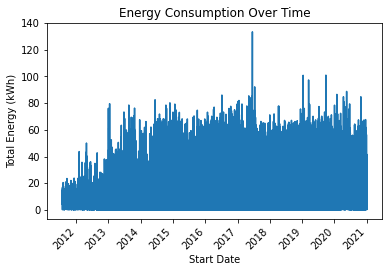

In [40]:
#This plot represnts the energy consumtion over the time 
df['Start Date'] = pd.to_datetime(df['Start Date'])
energy_over_time = df.groupby('Start Date')['Energy (kWh)'].sum()
energy_over_time.plot(kind='line')
plt.xlabel('Start Date')
plt.ylabel('Total Energy (kWh)')
plt.title('Energy Consumption Over Time')
plt.xticks(rotation=45)
plt.show()


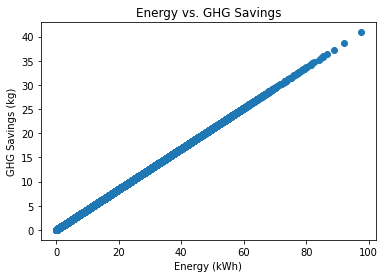

In [41]:
#This plot represnts the relation between the Energy used to the GHG Savings
plt.scatter(df['Energy (kWh)'], df['GHG Savings (kg)'])
plt.xlabel('Energy (kWh)')
plt.ylabel('GHG Savings (kg)')
plt.title('Energy vs. GHG Savings')
plt.show()


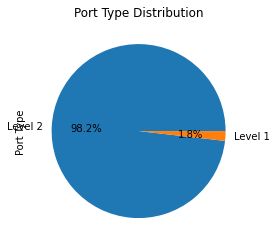

In [46]:
#This plot represnts Port type distribution all over the data
port_counts = df['Port Type'].value_counts()

port_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Port Type Distribution')
plt.show()


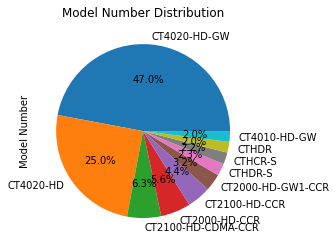

In [47]:
#This plot represents the distribution of Model numbers in the data
model_counts = df['Model Number'].value_counts()

model_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Model Number Distribution')
plt.show()

{1: 14888, 2: 12272, 3: 7264, 4: 3115, 5: 8488, 6: 5699, 7: 894, 8: 1631, 9: 494, 10: 254, 11: 1286, 12: 328, 13: 1067, 14: 1317, 15: 1340, 16: 1300, 17: 1234, 18: 1322, 19: 315, 20: 4895, 21: 5574, 22: 744, 23: 5305, 24: 5578, 25: 5220, 26: 468, 27: 6133, 28: 5258, 29: 16, 30: 5159, 31: 1041, 32: 1092, 33: 5665, 34: 4486, 35: 6089, 36: 9814, 37: 11163, 38: 5144, 39: 9256, 40: 774, 41: 1785, 42: 4189, 43: 6930, 44: 8317, 45: 4381, 46: 5857, 47: 3598, 48: 5332, 49: 5393, 50: 7554, 51: 5340, 52: 656, 53: 9179, 54: 4, 55: 3853, 56: 2226, 57: 2455, 58: 4556, 59: 183, 60: 802, 61: 1165, 62: 1419, 63: 3674, 64: 2263, 65: 2060, 66: 1038, 67: 615, 68: 696, 69: 445, 70: 29, 71: 3, 72: 4, 73: 1, 74: 2, 75: 4, 76: 7, 77: 8, 78: 2, 79: 4, 80: 1, 81: 1, 82: 1, 83: 1}


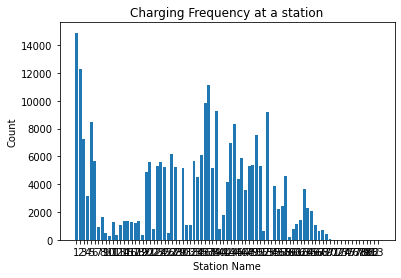

In [53]:
#This plot uniquely determines each of the charging port which has been used for charging.
unique_labels = {name: idx + 1 for idx, name in enumerate(df['MAC Address'].unique())}

key_list = list(unique_labels.keys())
val_list = list(unique_labels.values())

unique_label_counts = {idx: df['MAC Address'].value_counts()[key_list[val_list.index(idx)]] for idx in val_list}

names = list(unique_label_counts.keys())
values = list(unique_label_counts.values())

plt.bar(range(len(unique_label_counts)), values, tick_label=names)
plt.xlabel('MAC Address')
plt.ylabel('Count')
plt.title('Charging Frequency at a station')
plt.show()

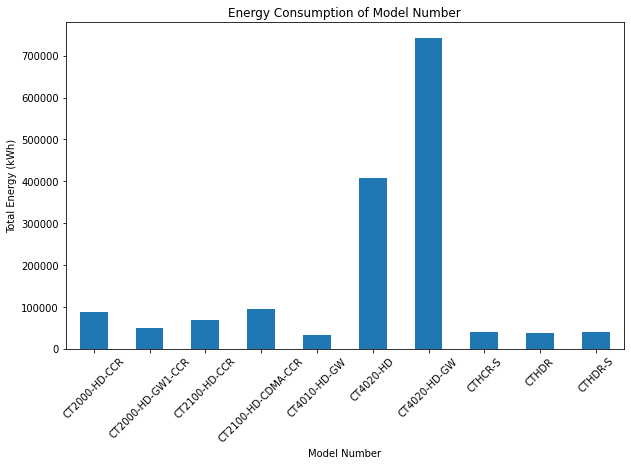

In [58]:
#This graph represents the energy consumed by each of the model number.
plt.figure(figsize=(10, 6))
df.groupby('Model Number')['Energy (kWh)'].sum().plot(kind='bar')
plt.xlabel('Model Number')
plt.ylabel('Total Energy (kWh)')
plt.title('Energy Consumption of Model Number')
plt.xticks(rotation=45)
plt.show()

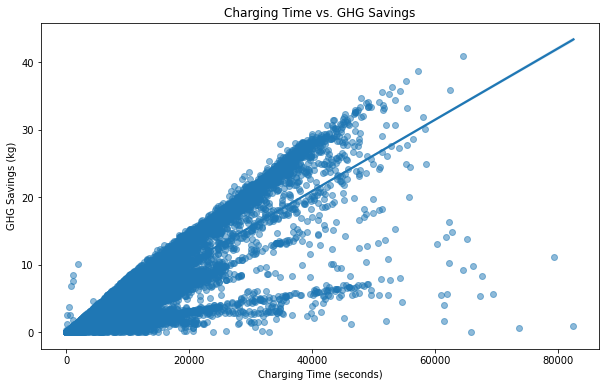

In [57]:
#This graph represents the relation of the charging time to the GHG savings
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Charging Time (hh:mm:ss)'].dt.total_seconds(), y=df['GHG Savings (kg)'], scatter_kws={'alpha':0.5})
plt.xlabel('Charging Time (seconds)')
plt.ylabel('GHG Savings (kg)')
plt.title('Charging Time vs. GHG Savings')
plt.show()